# 神经网络极简教程

欢迎来到神经网络基础教程。在这个教程中，我们将实现一个非常简单的 2 层神经网络（单隐藏层），通过它来深入理解神经网络的基本概念和实现方法。

多层感知器是一种基础的前馈神经网络，它包含一个输入层、一个或多个隐藏层和一个输出层。每一层都由多个神经元组成，这些神经元通过权重连接在一起。

我们将从以下几个方面来学习神经网络：

1. 隐藏层神经网络的搭建：我们将学习如何初始化神经网络的权重和偏置，以及如何根据输入数据计算每一层的输出。

2. 激活函数：我们将介绍两种常用的激活函数——Sigmoid 和 ReLU，以及它们的导数。激活函数用于引入非线性因素，使得神经网络可以拟合复杂的模式。

3. 优化算法：我们将学习如何使用梯度下降法来优化神经网络的权重和偏置，以最小化预测错误。

4. 反向传播算法：我们将详细解释反向传播算法的工作原理，这是一种高效计算梯度的方法，用于更新神经网络的权重和偏置。

5. 模型评估：我们将学习如何计算模型的损失，并使用这个信息来评估模型的性能。

通过这个教程，你将获得深入理解神经网络的知识，并掌握使用 Python 和 Numpy 实现神经网络的技能。

> [ref](https://github.com/Python-World/Python_and_the_Web/blob/4f8bf639415eb0cb587acb99322928aa29575847/Scripts/Miscellaneous/Neural%20Networks%20From%20Scratch/neural_net.py)

- 定义非线性激活函数及其导数

In [1]:
import numpy as np

def sigmoid(x, deriv=False):
    """
    计算给定输入的sigmoid函数。

    Args:
      x: Numeric input.
      deriv: If true, returns derivative on that point.

    Returns:
      Sigmoid or sigmoid derivative at specific point.
    """
    if deriv:
        # sigmoid函数的导数为sigmoid(x)*(1-sigmoid(x))
        return sigmoid(x) * (1 - sigmoid(x))
    # sigmoid函数的定义为1 / (1 + e^-x)
    return 1 / (1 + np.exp(-x))


def relu(x, deriv=False):
    """
    计算给定输入的ReLU函数。

    Args:
      x: Numeric input.
      deriv: If true, returns derivative on that point.

    Returns:
      ReLU or ReLU derivative at specific point.
    """
    if deriv:
        # ReLU函数的导数为1(x>0)，0(x<=0)
        return np.where(x > 0, 1, 0)
    # ReLU函数的定义为max(0, x)
    return np.maximum(0, x)

def act(x, mode='sigmoid', deriv=False):
    """
    根据mode参数选择激活函数。

    Args:
      x: Numeric input.
      mode: 'sigmoid' or 'relu'.
      deriv: If true, returns derivative on that point.

    Returns:
      Specific activation function or its derivative at specific point.
    """
    if mode == 'sigmoid':
        return sigmoid(x, deriv)
    elif mode == 'relu':
        return relu(x, deriv)
    else:
        raise ValueError("Invalid mode, choose 'sigmoid' or 'relu'.")


- 定义一个单隐层的全连接神经网络


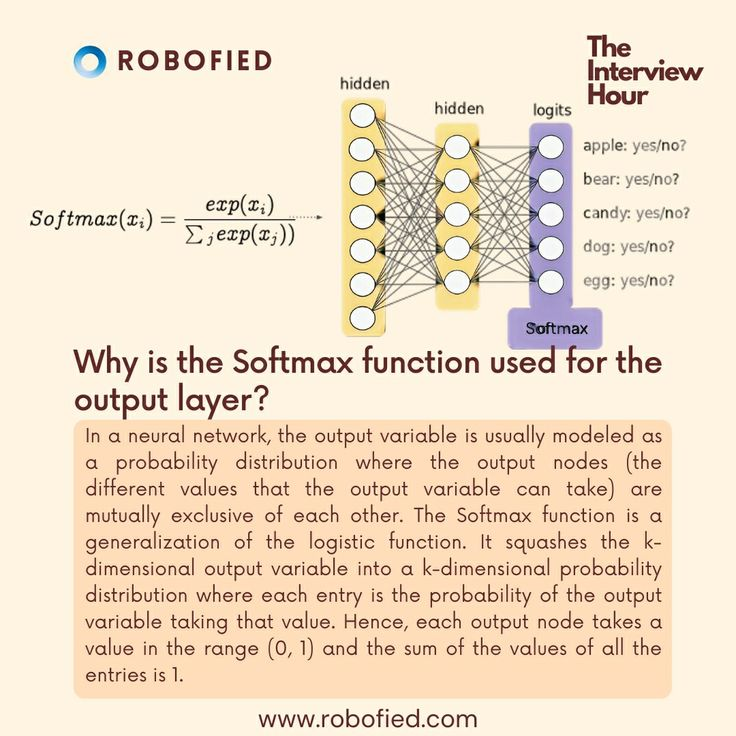

In [2]:
class MLP:
    """
    A implementation of a simple 2 layers Multilayer Perceptron.
    """

    def __init__(self, input_size, hidden_size, output_size):
        # 初始化权重矩阵，使用正态分布随机生成
        self.Wxh = np.random.randn(input_size, hidden_size)
        self.Who = np.random.randn(hidden_size, output_size)

    def forward(self, X, mode='sigmoid'):
        """
        前向传播过程。

        Args:
          X: Input vector with shape (N,x).
          mode: 'sigmoid' or 'relu'.

        Returns:
          Output vector with shape (L,N,o).
        """
        # 计算隐藏层的输出
        l1 = act(np.dot(X, self.Wxh), mode=mode)
        # 计算输出层的输出
        l2 = sigmoid(np.dot(l1, self.Who))

        return X, l1, l2

    def predict(self, X, mode='sigmoid'):
        """
        预测函数。

        Args:
          X: Input vector with shape (N,x).
          mode: 'sigmoid' or 'relu'.

        Returns:
          Output vector with shape (N,o).
        """
        # 获取输出层的输出
        l2 = self.forward(X, mode=mode)[2]
        return l2

    def fit(self, X, y, epochs=50, lr=1e-3, verb=True, mode='sigmoid'):
        """
        训练模型。

        Args:
          X: Training input vectors with shape (N,x).
          y: Training output classes with shape (N).
          epochs: Number of epochs.
          lr: Learning rate.
          mode: 'sigmoid' or 'relu'.

        Returns:
          A history of losses in each epoch.
        """
        total_loss = []

        for epoch in range(epochs):
            # 前向传播
            l0, l1, l2 = self.forward(X, mode)

            # 计算输出层误差
            l2_error = y - l2
            # 计算输出层梯度
            l2_delta = l2_error * sigmoid(l2, deriv=True)

            # 计算隐藏层误差
            l1_error = l2_delta.dot(self.Who.T)
            # 计算隐藏层梯度
            l1_delta = l1_error * act(l1, mode=mode, deriv=True)

            # 更新权重
            self.Who += lr * l1.T.dot(l2_delta)
            self.Wxh += lr * l0.T.dot(l1_delta)

            # 计算并记录损失
            epoch_loss = np.mean(np.abs(l2_error))
            total_loss.append(epoch_loss)
            
            if ((epoch % 1000) == 0) & (verb):
                # 每1000个epoch打印一次损失
                print("Loss: " + str(epoch_loss))

        # 返回每个epoch的损失
        return total_loss

## 简单的 XOR 门训练集

- 仅四个训练样本来表达的 XOR 异或门逻辑

        这是一个简单的XOR门训练集。XOR门是一种基本的逻辑门，它的输出在输入中有一个且仅有一个为真时为真。

        在这个训练集中，X_train 是输入数据，它包含了XOR门的所有可能输入组合。每个输入都是一个二元组，代表XOR门的两个输入。

        y_train 是对应的输出数据，它包含了每个输入组合对应的XOR门输出。

        X_train 的形状是 (4, 2)，表示有4个样本，每个样本有2个特征。y_train 的形状是 (4, 1)，表示有4个样本，每个样本有1个目标值。

In [4]:
# Heres a simple example with the XOR gate.
X_train = np.array(
    [[0, 0], [0, 1], [1, 0], [1, 1]]
)  # Generate the training X data

y_train = np.array([[0], [1], [1], [0]])  # Generate the training y data
X_train.shape, y_train.shape

((4, 2), (4, 1))

- 初始化模型权重参数 + 迭代训练 10000 遍 + 起始学习率是 1

In [5]:
model = MLP(2, 48, 1)  # Instanciate the model

loss = model.fit(X_train, y_train, 10000, 1)  # Fit the model with given data

Loss: 0.5152170554741468
Loss: 0.16036075327254593
Loss: 0.037351417912142616
Loss: 0.019276883396637173
Loss: 0.012926964435458304
Loss: 0.009760172598215155
Loss: 0.00788788796306899
Loss: 0.006658407398718316
Loss: 0.005789786011034465
Loss: 0.005141847782377836


- 考察模型的预测结果

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Test data

model.predict(X)  # Predict test output

array([[0.00379448],
       [0.99477147],
       [0.99466367],
       [0.00419219]])

## 更复杂的 XOR 训练数据集


这是一个生成XOR分布特征的二元分类数据集的例子，样本数量为10000。

首先，我们使用np.random.uniform函数在-2到2的范围内生成10000个二维样本，存储在X_xor中。然后，我们使用np.logical_xor函数计算每个样本的两个特征是否异号，结果存储在y_xor中。最后，我们使用np.where函数将y_xor中的真值（异号）转换为0，假值（同号）转换为1。

X_xor的形状是(10000, 2)，表示有10000个样本，每个样本有2个特征。y_xor的形状是(10000,)，表示有10000个样本，每个样本有1个目标值。

In [7]:
# 生成XOR训练数据集
# Generate a binary classification dataset with XOR distribution characteristics, the number of samples is 10k
np.random.seed(0)
X_xor = np.random.uniform(-2,2, size=(10000, 2))
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 0, 1)
X_xor.shape, y_xor.shape

((10000, 2), (10000,))

我们使用matplotlib的scatter函数绘制了这个数据集的散点图。在图中，y=0的样本用蓝色表示，y=1的样本用橙色表示。

可以看出，这个数据集具有XOR分布的特征，即当x和y同号时，目标值为1；当x和y异号时，目标值为0。

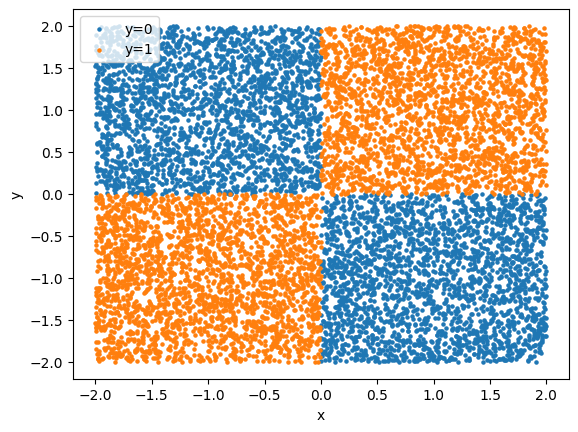

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_xor[y_xor == 0,0], X_xor[y_xor == 0,1], s=5, label='y=0')
plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor == 1,1], s=5, label='y=1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

- 由于训练数据样本量庞大，下面进行 mini-batch 训练


        使用小批量 (mini-batch) 梯度下降法训练模型的函数。小批量梯度下降法是一种优化算法，它结合了批量梯度下降法和随机梯度下降法的优点。

        在每个训练周期（epoch）中，首先对输入数据进行随机排列，然后按照指定的批量大小（batch_size）将数据分成多个小批量。对于每个小批量，我们使用模型的fit方法进行训练，并记录训练的损失。

        这个函数的输入参数包括模型（model）、输入数据（inputs）、输出数据（outputs）、训练周期数（epochs）和批量大小（batch_size）。函数返回每个训练周期的平均损失。

        这个函数使用了tqdm库来显示训练进度，使得训练过程更直观。

In [10]:
from tqdm import tqdm
def train_minibatch(model, inputs, outputs, epochs, batch_size):
    
    loss_epoch = []
    for epoch in tqdm(range(epochs)):
        permutation = np.random.permutation(inputs.shape[0])
        inputs_shuffled = inputs[permutation]
        outputs_shuffled = outputs[permutation]

        loss_iteration = []
        for i in range(0, inputs.shape[0], batch_size):
            end = i + batch_size if i + batch_size <= inputs.shape[0] else inputs.shape[0]
            batch_inputs = inputs_shuffled[i:end]
            batch_outputs = outputs_shuffled[i:end]
            
            loss = model.fit(batch_inputs, batch_outputs[...,np.newaxis], 1, 0.03, False, 'relu')  # Fit the model with given data

            loss_iteration.extend(loss)
        loss_epoch.append(np.mean(loss_iteration))
    return loss_epoch

- 模型初始化，并进行训练。`batch_size = 16`

In [11]:
model = MLP(2, 48, 1)  # Instanciate the model
num_epochs = 100

loss = train_minibatch(model, X_xor, y_xor, num_epochs, 16)
len(loss)

100%|██████████| 100/100 [00:04<00:00, 24.86it/s]


100

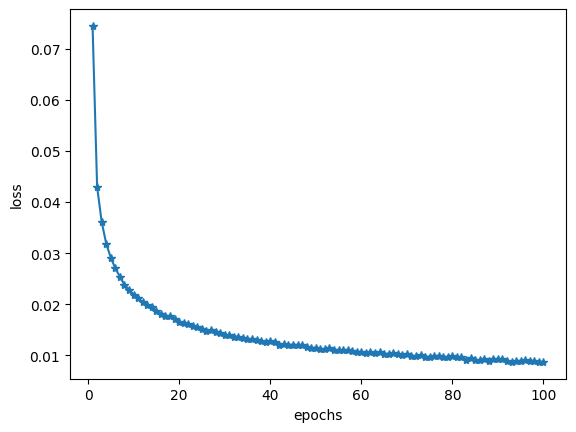

In [12]:
plt.plot(range(1, num_epochs+1), loss, '*-')
plt.xlabel('epochs')
plt.ylabel('loss');
# plt.yscale('log');

## Evaluation

这段代码首先使用训练好的模型对输入数据X_xor进行预测，得到预测结果y_pred。然后，设置阈值为0.5，将预测结果转换为二元分类结果。

In [14]:
y_pred = model.predict(X_xor, 'relu')[:,0]
y_pred

array([9.99999982e-01, 9.99999871e-01, 4.73175015e-13, ...,
       1.00000000e+00, 9.99999992e-01, 1.11155331e-19])

In [15]:
threshold = 0.5

接着，使用sklearn.metrics中的confusion_matrix函数计算混淆矩阵。

混淆矩阵是一种常用的评估分类模型性能的工具，它展示了模型预测结果和实际结果的对应关系。

In [17]:
y_xor

array([1, 1, 0, ..., 1, 1, 0])

In [19]:
(y_pred > threshold)*1

array([1, 1, 0, ..., 1, 1, 0])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_xor, y_pred > threshold)
confusion_matrix

array([[5016,   13],
       [  16, 4955]])

在混淆矩阵中，真阳性（TP）表示模型正确预测为正类的样本数，假阴性（FN）表示模型错误预测为负类的样本数，假阳性（FP）表示模型错误预测为正类的样本数，真阴性（TN）表示模型正确预测为负类的样本数。

这些指标可以帮助我们更好地理解模型的性能，例如模型对正类和负类的预测能力如何，是否存在偏向等。

In [22]:
TP = confusion_matrix[0,0]  # True positive
FN = confusion_matrix[0,1]  # False negative
FP = confusion_matrix[1,0]  # False positive
TN = confusion_matrix[1,1]  # True negative

<div class="sl-block is-focused" data-block-type="image" data-name="image-ecdf43" style="width: 780.456px; height: 431.793px; left: 42.044px; top: 248px; min-width: 1px; min-height: 1px;" data-origin-id="293ee0dbde2da4706165a10eec556fee"><div class="sl-block-content" style="z-index: 16;"><img class="" data-natural-width="1934" data-natural-height="1070" data-lazy-loaded="" src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/10690468/pasted-from-clipboard.png"></div></div>`

下面计算了几个重要的分类模型评估指标，包括准确率（accuracy）、精确率（precision）、召回率（recall）、F1分数和AUC值。

1. 准确率：准确率是模型预测正确的样本数占总样本数的比例。计算公式为：(TP + TN) / (TP + FP + FN + TN)。

2. 精确率：精确率是模型预测为正类且实际为正类的样本数占模型预测为正类的样本数的比例。计算公式为：TP / (TP + FP)。

3. 召回率：召回率是模型预测为正类且实际为正类的样本数占实际为正类的样本数的比例。计算公式为：TP / (TP + FN)。

4. F1分数：F1分数是精确率和召回率的调和平均值，它试图在精确率和召回率之间找到一个平衡。计算公式为：2*TP / (2*TP + FP + FN)。

5. AUC值：AUC值是ROC曲线下的面积，ROC曲线是以假阳性率为横坐标，真阳性率为纵坐标绘制的曲线。AUC值可以反映模型对正负类的区分能力，AUC值越大，模型的性能越好。

这些指标都是评估分类模型性能的重要工具，它们可以从不同的角度反映模型的性能。

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_xor, y_pred > threshold)

0.9971

In [24]:
# check
(TP + TN) / (TP + FP + FN + TN)

0.9971

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fbeta_score, _ = precision_recall_fscore_support(y_xor, y_pred > threshold)
precision, recall, fbeta_score

(array([0.99682035, 0.99738325]),
 array([0.99741499, 0.99678133]),
 array([0.99711758, 0.9970822 ]))

In [30]:
#check
print(TP / (TP + FP), TN / (FN + TN))  # precision
print(TP / (TP + FN), TN / (FP + TN))  # recall
print(2*TP / (2*TP + FP + FN), 2*TN / (2*TN + FP + FN)) # fbeta_score (beta=1)

0.9968203497615262 0.9973832528180354
0.9974149930403658 0.9967813317239992
0.997117582745254 0.9970822014287152


In [31]:
from sklearn.metrics import f1_score
f1_score(y_xor, y_pred > threshold)

0.9970822014287151

In [32]:
# check
2*TN / (2*TN + FP + FN) # f1_score

0.9970822014287152

In [33]:
# 不依赖于阈值 (下一讲)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_xor, y_pred)  # AUC

0.9999639987889193